In [1]:
exec(open("../../../python/FNC_init.py").read())

[**Demo %s**](#demo-fdconverge-order12)

Let's observe the convergence of the formulas in {numref}`Example {number} <example-fd-converge-FD11>` and {numref}`Example {number} <example-fd-converge-FD12>`, applied to the function $\sin(e^{x+1})$ at $x=0$.

In [2]:
f = lambda x: sin(exp(x + 1))
exact_value = exp(1) * cos(exp(1))

We'll compute the formulas in parallel for a sequence of $h$ values.

In [3]:
h_ = array([5 / 10**(n+1) for n in range(6)])
FD = zeros((len(h_), 2))
for (i, h) in enumerate(h_):
    FD[i, 0] = (f(h) - f(0)) / h 
    FD[i, 1] = (f(h) - f(-h)) / (2*h)
results = PrettyTable()
results.add_column("h", h_)
results.add_column("FD1", FD[:, 0])
results.add_column("FD2", FD[:, 1])
print(results)

+--------+---------------------+---------------------+
|   h    |         FD1         |         FD2         |
+--------+---------------------+---------------------+
|  0.5   |  -2.768575766550465 | -1.9704719803862911 |
|  0.05  | -2.6127952856136947 |  -2.475520256824717 |
| 0.005  | -2.4921052189334048 | -2.4783216951179465 |
| 0.0005 | -2.4797278609705042 | -2.4783494526022243 |
| 5e-05  | -2.4784875710526233 |  -2.478349730152263 |
| 5e-06  |  -2.478363517077753 |  -2.478349732970564 |
+--------+---------------------+---------------------+


All that's easy to see from this table is that FD2 appears to converge to the same result as FD1, but more rapidly. A table of errors is more informative.

In [4]:
errors = FD - exact_value
results = PrettyTable()
results.add_column("h", h_)
results.add_column("error in FD1", errors[:, 0])
results.add_column("error in FD2", errors[:, 1])
print(results)

+--------+-------------------------+------------------------+
|   h    |       error in FD1      |      error in FD2      |
+--------+-------------------------+------------------------+
|  0.5   |   -0.29022603359523025  |   0.5078777525689437   |
|  0.05  |   -0.1344455526584598   | 0.0028294761305178717  |
| 0.005  |   -0.01375548597816989  | 2.8037837288330536e-05 |
| 0.0005 |  -0.0013781280152693753 | 2.8035301058437767e-07 |
| 5e-05  |  -0.0001378380973884319 | 2.8029720766653554e-09 |
| 5e-06  | -1.3784122518067932e-05 | -1.532907134560446e-11 |
+--------+-------------------------+------------------------+


In each row, $h$ is decreased by a factor of 10, so that the error is reduced by a factor of 10 in the first-order method and 100 in the second-order method.

A graphical comparison can be useful as well. On a log-log scale, the error should (as $h\to 0$) be a straight line whose slope is the order of accuracy. However, it's conventional in convergence plots to show $h$ _decreasing_ from left to right, which negates the slopes.

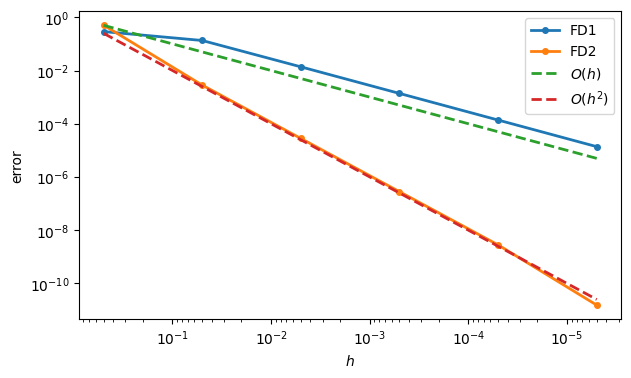

In [5]:
plot(h_, abs(errors), "o-", label=["FD1", "FD2"])
gca().invert_xaxis()
# Add lines for perfect 1st and 2nd order.
loglog(h_, h_, "--", label="$O(h)$")
loglog(h_, h_**2, "--", label="$O(h^2)$")
xlabel("$h$")
ylabel("error")
legend();